In [1]:
# Normal Sci. Comp. Imports
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
# create random number generator for later/throughout
rng = np.random.default_rng(seed=120695)

In [2]:
# Load the keras data set module:
from tensorflow.keras.datasets import mnist
# with mnist model data is already partitioned into training and validation
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

The data consists of 70,000 images of handwritten digits. The partition of the above data set is such that the training data set contains 60,000 images and the validation contains the other 10,000. Each images is a 28 by 28 2D array of integer values. 

In [4]:
print(f"The shape of the training data matrix/array is \n {x_train.shape} ")
print(f"The shape of the validation data matrix/array is \n {x_valid.shape} ")
print(f"and the data type for the training array is {x_train.dtype}")
print(f"and the data type for the validation array is {x_valid.dtype}")

The shape of the training data matrix/array is 
 (60000, 28, 28) 
The shape of the validation data matrix/array is 
 (10000, 28, 28) 
and the data type for the training array is uint8
and the data type for the validation array is uint8


The images are greyscale images and so the values in the arrays are integers between 0 and 255 (inclusive) indication the white level brightness. Be below for conformation

In [5]:
print(f"Minimum values of images is {x_train.min()} and the maximum is {x_train.max()}")
print(f"Here is a image for reference")


Minimum values of images is 0 and the maximum is 255
Here is a image for reference


<IPython.core.display.Javascript object>


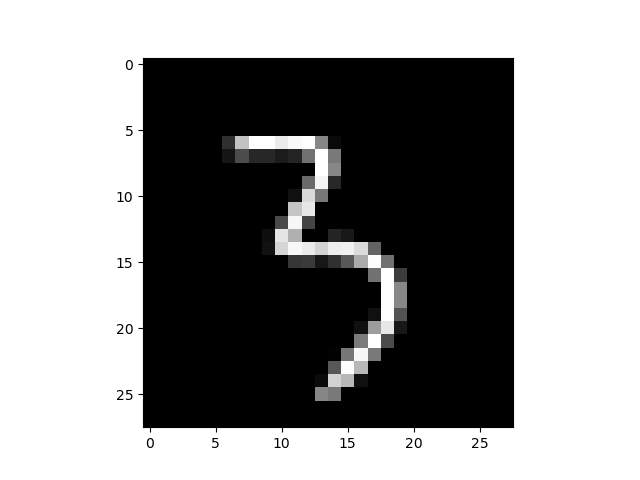

The displayed image label is 3


In [6]:
idx = rng.integers(low=0, high=x_train.shape[0])
image = x_train[idx]
plt.imshow(image, cmap='gray')
print(f"The displayed image label is {y_train[idx]}")

## Preparing Data
Here is where we can get to experimenting and trying different things. So in deep learning there are things that can be done to make the data better to work with. In particular, for classifying the mnist data set, Nvidia tutorial suggests the 3 following data transformations/preparations:
1. Flatten the image data, to simplify the image input into the model
2. Normalize the image data, to make the image input values easier to work with for the model
3. Categorize the labels, to make the label values easier to work with for the model

Now for simplicity I will only play around with the latter two of the preparations as I do not want to play around with other input times to the NN below. 

### Flatten (Reshape) the Image Data
So apparently we can set things up to have the nueral net model accept 2D images, but it can simplify things by `flattening` the image into a single continuous array of $28\times 28=784$ pixel values. Maybe at some point in time we can play around with 2D input for the model and see how the performance changes

In [7]:
x_train = x_train.reshape(-1, 784)
x_valid = x_valid.reshape(-1, 784)
print(f"x_train is now a {x_train.shape} shaped array")
print(f"x_valid is now a {x_valid.shape} shaped array")
print(f"As an example here is the above 1D array of the above displayed image \n {x_train[idx]}")

x_train is now a (60000, 784) shaped array
x_valid is now a (10000, 784) shaped array
As an example here is the above 1D array of the above displayed image 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  47 194 255 254 235 249
 254 134   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  21  76  39  39  27  3

### Normalized and not nomalized data
So as was mentioned above, one way to simplify things would be normalizing the data; in the case of this image data (integer pixel values) we could do that be mapping all the integer values from the range $0-255$ into the interval $[0,1]$. This can be done by a simple division of 255 and in this case this is the normalization as each pixel can only be an integer value between 0 and 255$. We for the purposes of trying different things and testing the validity of this claim will have normalized data and non-normalized data and compare the results. 

In [8]:
norm_tr = x_train / 255
norm_va = x_valid / 255
# double check that the values are of type float and that they are between 0 and 1
print(f"Data type of normalized data: {norm_tr.dtype}\n Min of normalized: {norm_tr.min()} and max is {norm_tr.max()}")

Data type of normalized data: float64
 Min of normalized: 0.0 and max is 1.0


### Categorical encodeing
One of the suggestions made to simply the model is to use categorical encoding: transform the data labels so that each value is a collection of all the possible categories, with the actual catgory that this particular value is set as true. The reason for doing this, according to the Nvidia Deep Learning Fundamentals workshop is that 
> ... the labels for the images are integers between 0 and 9. Because these values represent a numerical range, the model might try to draw some conclusions about its performance based on how close to the correct numerical category it guesses.

Specifically the transformation is that the values which are intended to be understood as categorical labels into a represenation that makes their categorical nature explicit to the model. As an example, if we had the labels/values of

```python
values = ['red', 'green', 'blue', 'green']
```
the categorical encoding would transform the above data labels to 
```python
values = [ 
    [1, 0, 0]
    [0, 1, 0]
    [0, 0, 1]
    [0, 1, 0]
]
```
Apparently the NN would have a harder time to making sense of the first values array/list then this harder one. Now are labels are numeric values between 0-9. We will still use categorical encoding (see below what it looks like) but will also test a model without categorical encoding. 

In [11]:
import tensorflow.keras as keras
num_categories = 10
# use the keras library/wrapper function to create the categories
y_tr_encoded = keras.utils.to_categorical(y_train, num_categories)
y_va_encoded = keras.utils.to_categorical(y_valid, num_categories)
# take a look at what the categorical encoding looks like
print(f"First ten categorical encodings: \n {y_tr_encoded[0:9]}")
print(f"the values from which the categories were transformed from:\n{y_train[0:9]}")

First ten categorical encodings: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
the values from which the categories were transformed from:
[5 0 4 1 9 2 1 3 1]


Basically the encoding changed the numeric label $x$ to the single dimensional array with the $x^{th}$ element a 1 and zeros elsewhere.

## Create the Models
In this notebook we will only be using forward feed neural networks (FFNN). We will save trying to use a convolusional neural network (CNN) on this classification problem for another notebook. So below we will create for models:
1. A model that uses the normalized data and categorical encoding of the labels (i.e. norm_tr and y_tr_encoded)
2. Another model that uses the normalized data but the original data labels- no categorical encoding (i.e. norm_tr and y_train)
3. A model with non-normalized (original) data but with categorically encoded data (i.e. x_train and y_tr_encoded)
4. No simplification model; Non-normalized data and non-categorically encoded data labels (i.e. x_train and y_train)

(What largely follows comes from the Nvidia workshop tutorial on the fundamentals of deep learning) 
### Instantiating the Model
To start off we will use Keras's Sequential model class to instantiate an instance of a model that will have 3 series of layers that data will pass though in sequence (which is why I think that this is a forward feed network)

In [12]:
from tensorflow.keras.models import Sequential
# model numbers relate to the numbering (listing) in the above markdown cell
model1 = Sequential() 
model2 = Sequential()
model3 = Sequential()
model4 = Sequential()

### Creating the Input Layer
Next, we will add the input layer. This layer will be *densely connected*, meaning that each neuron in it, and its weights, will affect every neuron in the next layer. To do this with Keras, we use Keras's [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer class.

In [13]:
from tensorflow.keras.layers import Dense

The `units` argument specifies the number of neurons in the layer. We can play around with this number but I will note that the work shop says that Nvidia says that 512 is a good number from experimentation. In generally choosing the correct number of neurons is what puts the "science" in "data science" as it is a matter of capturing the statistical complexity of the dataset but can be, and often is, a difficult and time consuming thing to do. The task of classifying the MNIST data set, I (Erik) have found that with the following layer, the number of nuerons even as low as 20 still gave 95% and higher validation accuracy only after 10 epochs. That said, still feel free to play around with the number of neurons on each layerto see how it affects training and to start developing a sense for what this number means.

The `input_shape` value specifies the shape of the incoming data which in our situation is a 1D array of 784 values. At a later time we can play around with the input shape maybe being (28, 28) which is the original way the MNIST images are stored.

Regarding the activation function, there are a number of activation functions to choose from and the activation funciton can be set either through using the `Activation` layer or through the `activation` argument by all forward layers. The available activations are the follow: (1) rectified linear unit activation function `'relu'`, (2) sigmoid `'sigmoid'`, (3) softmax `'softmax'`, (4) softplus `'softplus'`, (5) softsign `'softsign'`, (6) hyperbolic tangent `'htan'`, (7) scaled exponential linear unit `'selu'`, (8) eponetial linear unit `'elu'`, (9) exponential `'exponential'` (10) custom function (lets not try this). For more about these activation funtion visit [here](https://keras.io/api/layers/activations/) for some keras documentation on the layers.

At the moment let's just play with only on activation function. If we want to use different activation function to test different models with we can do that later and probably do so by creating some wrapper functions to speed things up.

In [14]:
model1.add(Dense(units=50, activation='relu', input_shape=(784,)))
model2.add(Dense(units=50, activation='relu', input_shape=(784,)))
model3.add(Dense(units=50, activation='relu', input_shape=(784,)))
model4.add(Dense(units=50, activation='relu', input_shape=(784,)))

### Creating Hidden Layers:
So to add layer to the model we just use the add method with the arguement the layer you want. [Here](https://keras.io/api/models/sequential/#add-method) is a bit documention on the sequential model class and details on the add class at the very bottom. For now we will add 1 densely connected hidden layer. Note if we wanted to remove a layer it seems that we could use the pop method instead of add.

In [15]:
model1.add(Dense(units=50, activation='relu'))
model2.add(Dense(units=50, activation='relu'))
model3.add(Dense(units=50, activation='relu'))
model4.add(Dense(units=50, activation='relu'))

### Create the output layer
Finally, we will add an output layer. This layer uses the activation function `softmax` which will result in each of the layer's values being a probability between 0 and 1 and will result in all the outputs of the layer adding to 1. In this case, since the network is to make a guess about a single image belonging to 1 of 10 possible categories, there will be 10 outputs. Each output gives the model's guess (a probability) that the image belongs to that specific class:

In [16]:
model1.add(Dense(units=10, activation='softmax'))
model2.add(Dense(units=10, activation='softmax'))
model3.add(Dense(units=10, activation='softmax'))
model4.add(Dense(units=10, activation='softmax'))

### Model Summary
We can use the summary method from the model class to get a summer of the layers, the number of parameters of the model we have created. Since we have create all the models with the same layers, nodes per layer, and activation functions per layer, the summary of any of the 4 models will be the same so we only display on summary.

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


### Compile the model
So we have yet to give the model some sort of loss function for it to optimize against the parameters as well as metric to maximize. This is done when the model is [compiled](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile). There is a number of arguments to give the compile function but here only worry about the loss function and the metrics and leave the rest to there default values (though we may want to look into them). Now the matter of loss functions ther are a [number](https://keras.io/api/losses/) of them. At first will use the categorical cross entropy loss for the validation data that has been categorically encoded, in the one_hot format above and use the sparse categorical cross entroy for the other non categorically encoded labels as theses values are given as integers which this loss function expects. We also specify that we would like to track `accuracy` while the model trains, for other metrics see [here](https://keras.io/api/metrics/)

In [18]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model4.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training the model
Now that we have prepared training and validation data, and a model, it's time to train our model with our training data, and verify it with its validation data.

When fitting (training) a model with Keras, we use the model's [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method. It expects the following arguments:

* The training data
* The labels for the training data
* The number of times it should train on the entire training dataset (called an *epoch*)
* The validation or test data, and its labels

Run the cells below to train the models

In [20]:
history1 = model1.fit(
    norm_tr, y_tr_encoded, epochs=10, verbose=1, validation_data=(norm_va, y_va_encoded)
)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2986 - accuracy: 0.9135 - val_loss: 0.1861 - val_accuracy: 0.9459
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1426 - accuracy: 0.9575 - val_loss: 0.1250 - val_accuracy: 0.9620
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1085 - accuracy: 0.9686 - val_loss: 0.1176 - val_accuracy: 0.9656
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0911 - accuracy: 0.9729 - val_loss: 0.0984 - val_accuracy: 0.9707
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0786 - accuracy: 0.9771 - val_loss: 0.1115 - val_accuracy: 0.9709
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0711 - accuracy: 0.9792 - val_loss: 0.1039 - val_accuracy: 0.9715
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0648 - accuracy: 0.9811 - val_loss: 0.1125 - val_ac

In [21]:
history2 = model2.fit(
    norm_tr, y_train, epochs=10, verbose=1, validation_data=(norm_va, y_valid)
)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3019 - accuracy: 0.9115 - val_loss: 0.1557 - val_accuracy: 0.9534
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1482 - accuracy: 0.9558 - val_loss: 0.1295 - val_accuracy: 0.9617
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1148 - accuracy: 0.9663 - val_loss: 0.1144 - val_accuracy: 0.9653
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0953 - accuracy: 0.9721 - val_loss: 0.1139 - val_accuracy: 0.9673
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0837 - accuracy: 0.9757 - val_loss: 0.1118 - val_accuracy: 0.9692
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0748 - accuracy: 0.9781 - val_loss: 0.1065 - val_accuracy: 0.9710
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0686 - accuracy: 0.9808 - val_loss: 0.1117 - val_ac

In [22]:
history3 = model3.fit(
    x_train, y_tr_encoded, epochs=10, verbose=1, validation_data=(x_valid, y_va_encoded)
)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.4485 - accuracy: 0.8284 - val_loss: 0.4745 - val_accuracy: 0.9049
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3856 - accuracy: 0.9233 - val_loss: 0.3109 - val_accuracy: 0.9378
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2906 - accuracy: 0.9408 - val_loss: 0.3321 - val_accuracy: 0.9372
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2505 - accuracy: 0.9476 - val_loss: 0.2707 - val_accuracy: 0.9430
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2426 - accuracy: 0.9493 - val_loss: 0.2402 - val_accuracy: 0.9537
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2302 - accuracy: 0.9536 - val_loss: 0.2894 - val_accuracy: 0.9540
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2207 - accuracy: 0.9558 - val_loss: 0.2489 - val_ac

In [23]:
history4 = model4.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.4256 - accuracy: 0.8306 - val_loss: 0.5064 - val_accuracy: 0.8990
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4521 - accuracy: 0.9102 - val_loss: 0.4351 - val_accuracy: 0.9135
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3844 - accuracy: 0.9243 - val_loss: 0.3951 - val_accuracy: 0.9180
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3404 - accuracy: 0.9343 - val_loss: 0.4293 - val_accuracy: 0.9270
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3233 - accuracy: 0.9384 - val_loss: 0.3771 - val_accuracy: 0.9302
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2998 - accuracy: 0.9439 - val_loss: 0.4037 - val_accuracy: 0.9300
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2912 - accuracy: 0.9475 - val_loss: 0.3653 - val_ac

In [19]:
print(norm_tr.shape)
print(y_tr_encoded.shape)
print(norm_va.shape)
print(y_va_encoded.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
